In [13]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [40]:
%%R
library(tidyverse)
# library(data.table)
library(ggplot2)
# install.packages('ggeasy')
library(ggeasy)

In [15]:
%%R
data<-read_csv('/content/drive/MyDrive/Research/COVID-19_Case_Surveillance_Public_Use_Data.csv')

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  cdc_case_earliest_dt = col_date(format = ""),
  cdc_report_dt = col_date(format = ""),
  pos_spec_dt = col_date(format = ""),
  onset_dt = col_date(format = ""),
  current_status = col_character(),
  sex = col_character(),
  age_group = col_character(),
  race_ethnicity_combined = col_character(),
  hosp_yn = col_character(),
  icu_yn = col_character(),
  death_yn = col_character(),
  medcond_yn = col_character()
)




In [16]:
%%R
data


# A tibble: 18,379,871 x 12
   cdc_case_earlie… cdc_report_dt pos_spec_dt onset_dt   current_status sex  
   <date>           <date>        <date>      <date>     <chr>          <chr>
 1 2020-01-01       2020-01-01    2020-01-01  NA         Laboratory-co… Fema…
 2 2020-01-01       2020-01-01    2020-01-01  NA         Laboratory-co… Fema…
 3 2020-01-02       2020-01-02    2020-01-02  NA         Laboratory-co… Fema…
 4 2020-01-02       2020-01-02    2020-01-02  NA         Laboratory-co… Male 
 5 2020-01-02       2021-01-27    2020-01-02  NA         Laboratory-co… Male 
 6 2021-01-01       2020-01-03    2020-01-03  2021-01-01 Laboratory-co… Male 
 7 2020-01-04       2020-01-04    2020-01-04  NA         Laboratory-co… Male 
 8 2020-01-04       2020-01-04    2020-01-04  NA         Laboratory-co… Fema…
 9 2020-01-04       2020-01-04    2020-01-04  NA         Laboratory-co… Fema…
10 2020-06-13       2020-01-04    2020-01-04  NA         Laboratory-co… Fema…
# … with 18,379,861 more rows, and 6

R[write to console]: `geom_smooth()` using formula 'y ~ x'



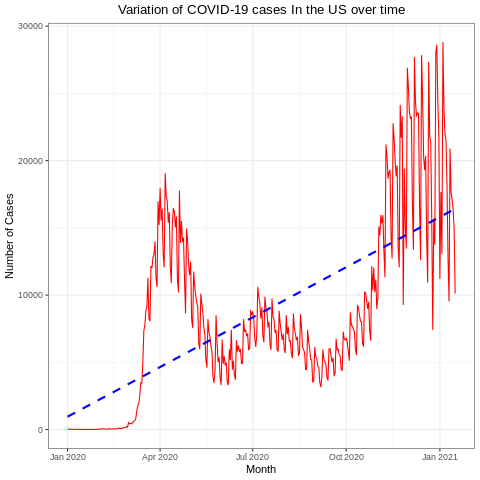

In [41]:
%%R
data
mydata<-data

# new data frome
new_data<- mydata%>%
  select(cdc_case_earliest_dt,sex, age_group, race_ethnicity_combined, medcond_yn, icu_yn,death_yn, hosp_yn)


#-------------------------------------------------------------------------------------------------------------------------------------------------

# 
new_data$medcond_yn[new_data$medcond_yn=='Missing']<-NA
new_data$icu_yn[new_data$icu_yn=='Missing']<-NA
new_data$death_yn[new_data$death_yn=='Missing']<-NA
new_data$hosp_yn[new_data$hosp_yn=='Missing']<-NA
new_data$age_group[new_data$age_group=='Missing']<-NA


# defining a new data frame
mydata1<-new_data
# time series for all covid cases from jan 2020 till jan 2021 ####
d_covid<-mydata1%>%filter(!is.na(hosp_yn))%>%filter(!is.na(icu_yn))%>% filter(!is.na(death_yn))%>%
  group_by(cdc_case_earliest_dt)%>%summarize(count=n())



d_covid%>% ggplot(aes(x=cdc_case_earliest_dt,y=count))+geom_line(color='red')+labs(title = 'Variation of COVID-19 cases In the US over time', x='Month', y='Number of Cases')+
  geom_smooth(method = 'lm', se=FALSE, linetype='dashed', color='blue')+theme_bw()+ggeasy::easy_center_title()

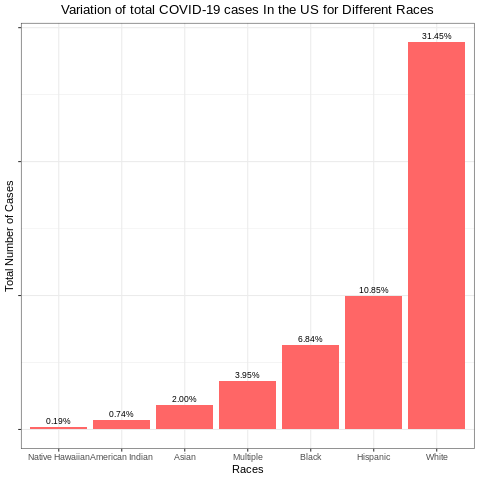

In [42]:
%%R
#-------------------------------------------------------------------------------------------------------------------------------------------#

# all races analysis for covid cases ####
race_df<-mydata1%>%filter(!is.na(race_ethnicity_combined)) %>%group_by(race_ethnicity_combined)%>%summarize(count=n())%>%
  mutate(percentage=prop.table(count))%>% arrange(desc(percentage))
x<-race_df$race_ethnicity_combined
race_df$race_ethnicity_combined<-gsub("(.*),.*", "\\1", x)
# removing missing and unknown
x<-race_df$race_ethnicity_combined
race_df$race_ethnicity_combined<-gsub("(.*)/.*", "\\1", x)
race_df<-as_tibble(race_df)
race_df %>% filter(race_df$race_ethnicity_combined %in%c("American Indian","Asian","Black","Hispanic","Multiple","Native Hawaiian","White"))

race_df<-race_df%>% filter(race_ethnicity_combined != c("Unknown"))
race_df<-race_df %>% filter(race_ethnicity_combined != c("Missing"))

race_df%>% ggplot(aes(reorder(race_ethnicity_combined, count),count,label = scales::percent(percentage)))+geom_bar(stat="identity",fill='#FF6666')+
  labs(title = 'Variation of total COVID-19 cases In the US for Different Races', x='Races', y='Total Number of Cases')+
  geom_text(position = position_dodge(width = .9),    # move to center of bars
            vjust = -0.5,                             # nudge above top of bar
            size = 3) + 
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+
  theme_bw()+ggeasy::easy_center_title()+theme(axis.text.y = element_blank())
#-----------------------------------------------------------------------------------

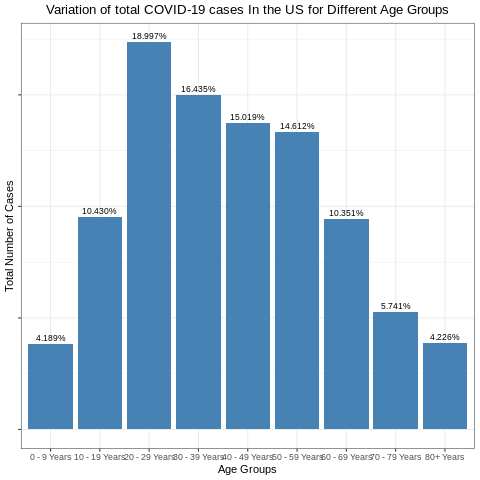

In [43]:
%%R
# cumulative ages and races for covid cases ####
#All age groups cases for all races 
age_df<-mydata1%>%filter(!is.na(age_group)) %>%group_by(age_group)%>%summarize(count=n())%>% mutate(percentage=prop.table(count))
age_df%>% ggplot(aes(age_group,count,label = scales::percent(percentage)))+geom_bar(stat="identity",fill='SteelBlue')+
  labs(title = 'Variation of total COVID-19 cases In the US for Different Age Groups', x='Age Groups', y='Total Number of Cases')+
  theme_bw()+
  geom_text(position = position_dodge(width = .9),    # move to center of bars
            vjust = -0.5,                             # nudge above top of bar
            size = 3) + 
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+
  ggeasy::easy_center_title()

R[write to console]: `summarise()` has grouped output by 'race_ethnicity_combined'. You can override using the `.groups` argument.



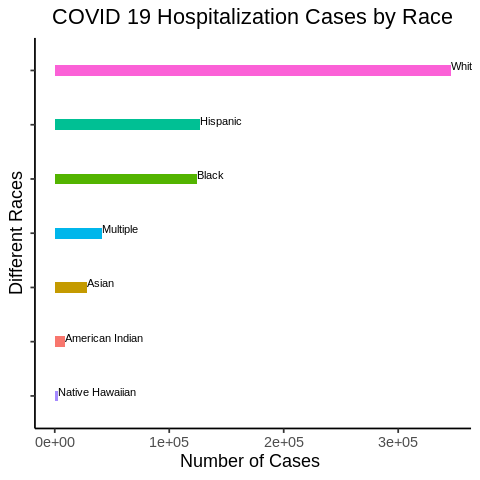

In [44]:
%%R
## people who have medical conditions and are in the hospitaliza by race
host_data<-mydata1%>%group_by(race_ethnicity_combined, hosp_yn)%>%filter(!is.na(race_ethnicity_combined))%>%
  summarize(count=n())%>%filter(hosp_yn=='Yes')%>% mutate(percentage=count/sum(count))%>%arrange(desc(count))

host_data
# Hospitalization by race ####

# removing everything after  comma
x<-host_data$race_ethnicity_combined
host_data$race_ethnicity_combined<-gsub("(.*),.*", "\\1", x)
# removing before '/'
x<-host_data$race_ethnicity_combined
host_data$race_ethnicity_combined<-gsub("(.*)/.*", "\\1", x)
# removing missing and unknown
host_data<-as_tibble(host_data)
host_data %>% filter(host_data$race_ethnicity_combined %in% c("American Indian","Asian","Black","Hispanic","Multiple","Native Hawaiian","White"))

host_data<-host_data %>% filter(race_ethnicity_combined != c("Unknown"))
host_data<-host_data %>% filter(race_ethnicity_combined != c("Missing"))

plot_m<-host_data %>% ggplot(aes(reorder(host_data$count,race_ethnicity_combined,labels = scales::percent),x=host_data$count,fill=host_data$race_ethnicity_combined))+
  geom_bar(stat="identity",position = "dodge",width=0.2)+
  theme_classic(base_size = 18)+
  ylab("Different Races")+ # for the x axis label
  xlab("Number of Cases ")+ # for the y axis label
  labs(fill="Races",title='COVID 19 Hospitalization Cases by Race')+ geom_text(aes(label = race_ethnicity_combined), hjust=-0.001,vjust =0.001)
plot_m+theme(axis.text.y = element_blank())+ theme(legend.position = 'none')+ ggeasy::easy_center_title()


R[write to console]: `summarise()` has grouped output by 'age_group'. You can override using the `.groups` argument.

R[write to console]: `summarise()` has grouped output by 'race_ethnicity_combined', 'icu_yn'. You can override using the `.groups` argument.



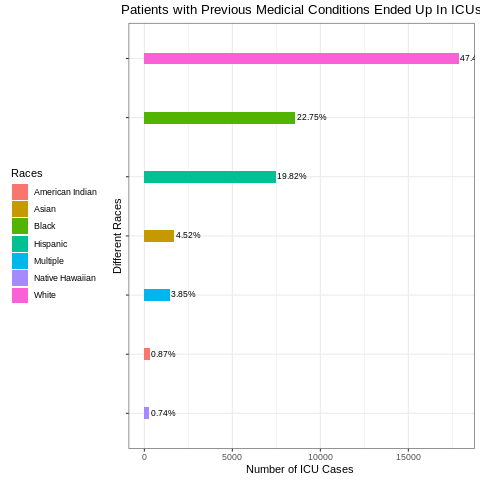

In [45]:
%%R
# new analysis hospi by age group 
# people who have medical conditions and are in the hospitalization by race
age_host_data<-mydata1%>%group_by(age_group, hosp_yn)%>%filter(!is.na(age_group))%>%
  summarize(count=n())%>%filter(hosp_yn=='Yes')%>%arrange(desc(count))

age_host_data


age_host_data
# Hospitalization by race ####


plot_m<-age_host_data %>% ggplot(aes(reorder(age_host_data$count,age_group),x=age_host_data$count,fill=age_host_data$age_group))+
  geom_bar(stat="identity",position = "dodge",width=0.2)+
  theme_classic(base_size = 18)+
  ylab("Different Age Groups")+ # for the x axis label
  xlab("Number of Cases ")+ # for the y axis label
  labs(fill="Age Group",title='COVID 19 Hospitalization Cases by Age group')+ geom_text(aes(label =age_group), hjust=-0.001,vjust =0.001)
plot_m+theme(axis.text.y = element_blank())+ theme(legend.position = 'none')+ggeasy::easy_center_title()

#------------------------------------------------------------------------------------------------------------#
#1
## people who have medical conditions and are in the ICU by race ####
medcond_data<-mydata1%>% filter(!is.na(icu_yn))%>%group_by(race_ethnicity_combined, icu_yn, medcond_yn)%>%summarize(count=n())%>%
  filter(icu_yn=='Yes' & medcond_yn=='Yes')
# removing everything after  comma
x<-medcond_data$race_ethnicity_combined
medcond_data$race_ethnicity_combined<-gsub("(.*),.*", "\\1", x)
#removing everything after /
x<-medcond_data$race_ethnicity_combined
medcond_data$race_ethnicity_combined<-gsub("(.*)/.*", "\\1", x)
# removing missing and unknown
medcond_data<-as_tibble(medcond_data)
medcond_data %>% filter(medcond_data$race_ethnicity_combined %in%c("American Indian","Asian","Black","Hispanic","Multiple","Native Hawaiian","White"))

medcond_data<-medcond_data %>% filter(race_ethnicity_combined != c("Unknown"))
medcond_data<-medcond_data %>% filter(race_ethnicity_combined != c("Missing"))
medcond_data<-medcond_data%>%mutate(perc=prop.table(count))
medcond_data

plot_m<-medcond_data %>% ggplot(aes(reorder(medcond_data$count,race_ethnicity_combined),x=medcond_data$count,fill=medcond_data$race_ethnicity_combined, label = scales::percent(perc)))+
  geom_bar(stat="identity",position = "dodge",width=0.2)+
  theme_classic(base_size = 18)+
  ylab("Different Races")+ 
  xlab("Number of ICU Cases ")+ 
  labs(fill="Races",title='Patients with Previous Medicial Conditions Ended Up In ICUs') 
plot_m+theme_bw()+theme(axis.text.y = element_blank())+ theme(legend.position = 'left')+ggeasy::easy_center_title()+
  geom_text(position = position_dodge(width = .9),    
           vjust = 0.4,                             
           size = 3,
           hjust=-0.05)


R[write to console]: `summarise()` has grouped output by 'race_ethnicity_combined', 'icu_yn'. You can override using the `.groups` argument.



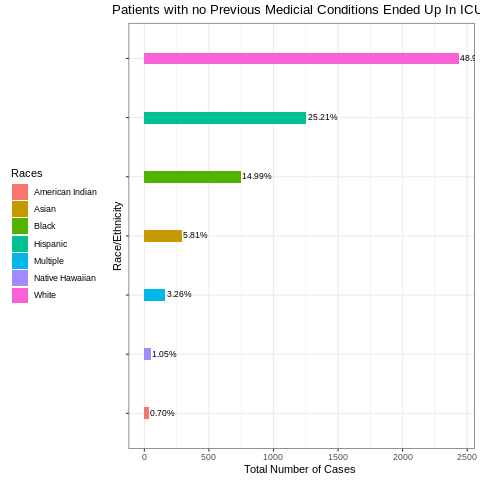

In [46]:
%%R
#2
## people who dont have medical conditions and are in the ICU by race ####
medcond_data<-mydata1%>% filter(!is.na(icu_yn))%>%group_by(race_ethnicity_combined, icu_yn, medcond_yn)%>%summarize(count=n())%>%
  filter(icu_yn=='Yes' & medcond_yn=='No')

medcond_data
# removing everything after  comma

x<-medcond_data$race_ethnicity_combined
medcond_data$race_ethnicity_combined<-gsub("(.*),.*", "\\1", x)
x<-medcond_data$race_ethnicity_combined
medcond_data$race_ethnicity_combined<-gsub("(.*)/.*", "\\1", x)
#
medcond_data<-as_tibble(medcond_data)
medcond_data %>% filter(medcond_data$race_ethnicity_combined %in%c("American Indian","Asian","Black","Hispanic","Multiple","Native Hawaiian","White"))

medcond_data<-medcond_data %>% filter(race_ethnicity_combined != c("Unknown"))
medcond_data<-medcond_data %>% filter(race_ethnicity_combined != c("Missing"))
medcond_data<-medcond_data%>% mutate(perc=prop.table(count))

medcond_data
plot_m<-medcond_data %>% ggplot(aes(reorder(medcond_data$count,race_ethnicity_combined),x=medcond_data$count,fill=medcond_data$race_ethnicity_combined, label = scales::percent(perc)))+
  geom_bar(stat="identity",position = "dodge",width=0.2)+
  theme_classic(base_size = 18)+
  ylab("Race/Ethnicity")+ 
  xlab("Total Number of Cases ")+ 
  labs(fill="Races",title='Patients with no Previous Medicial Conditions Ended Up In ICUs')
plot_m+ theme_bw()+ theme(axis.text.y = element_blank())+theme(legend.position =  'left')+ggeasy::easy_center_title()+
  geom_text(position = position_dodge(width = .9),    
            vjust = 0.4,                             
            size = 3,
            hjust=-0.05)+scale_fill_discrete()

In [47]:
%%R

sex_cases<-mydata1 %>%filter(!is.na(hosp_yn))%>%filter(!is.na(sex))%>%filter(!is.na(age_group)) %>%group_by(sex)%>%summarize(count=n())%>%
  mutate(percentage=prop.table(count))
sex_cases

# A tibble: 5 x 3
  sex       count percentage
* <chr>     <int>      <dbl>
1 Female  5284543  0.523    
2 Male    4736108  0.469    
3 Missing   12991  0.00129  
4 Other       186  0.0000184
5 Unknown   67737  0.00671  


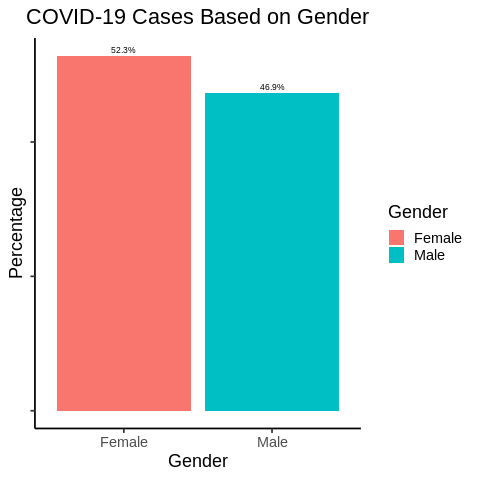

In [48]:
%%R
# removing the missing other and unknown sexes

sex_cases<-sex_cases%>%filter(sex %in% c('Female','Male'))
# sex_cases<-sex_cases%>%filter(hosp_yn %in% c('No','Yes'))
a<-sex_cases%>% ggplot(aes(sex,count,fill=sex, label = scales::percent(percentage)
))+geom_bar(stat="identity",position ='dodge')+
  theme_classic(base_size = 18)+
  xlab("Gender")+ 
  ylab("Percentage")+ 
  labs(fill="Gender",title='COVID-19 Cases Based on Gender')+
  geom_text(position = position_dodge(width = .9),    
                                        vjust = -0.5,                             
                                        size = 3) + 
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+ggeasy::easy_center_title()
a
 

In [25]:
%%R
a
a<-1+2
a

R[write to console]: Error in withVisible({ : object 'a' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in withVisible({ : object 'a' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible


In [49]:
%%R

sex_cases<-mydata1%>%filter(!is.na(hosp_yn))%>%filter(!is.na(sex))%>%filter(!is.na(age_group)) 

sex_cases<-sex_cases%>%mutate(date_by_month= strftime(cdc_case_earliest_dt,'%m'))%>% group_by(date_by_month,sex)%>%summarize(count=n())


R[write to console]: `summarise()` has grouped output by 'date_by_month'. You can override using the `.groups` argument.



In [50]:
%%R
sex_cases<-sex_cases%>%filter(sex %in% c('Female','Male'))



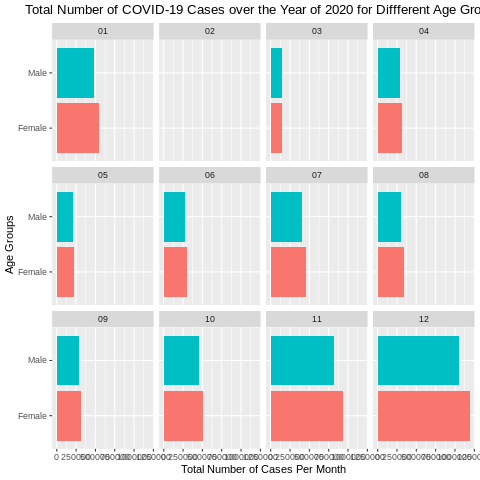

In [51]:
%%R
sex_cases%>% ggplot(aes(y=sex,x= count,fill=sex))+
  geom_bar(stat="identity")+facet_wrap(~date_by_month)+labs(title = 'Total Number of COVID-19 Cases over the Year of 2020 for Diffferent Age Groups' , x='Total Number of Cases Per Month', y='Age Groups')+
  ggeasy::easy_center_title()+theme(legend.position = 'none')

facet_wrap(~date_by_month)+labs(title = 'Total Number of COVID-19 Cases over the year of 2020 Bases on Races/Ethnicities ' , x='Total Number of Cases Per Month', y='Race/Ethnicity')+
  ggeasy::easy_center_title()+theme(legend.position = 'none')


R[write to console]: `summarise()` has grouped output by 'hosp_yn'. You can override using the `.groups` argument.



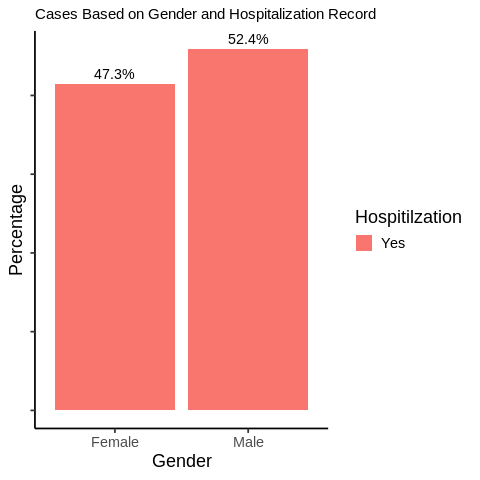

In [70]:
%%R

hos_cases<-mydata1 %>%filter(!is.na(hosp_yn))%>%filter(!is.na(sex)) %>%group_by(hosp_yn,sex)%>%summarize(count=n())%>%
  mutate(percentage=prop.table(count))
hos_cases
# removing the missing other and unknown sexes
hos_cases<-hos_cases%>%filter(sex %in% c('Female','Male'))
# hos_cases<-hos_cases%>%filter(hosp_yn %in% c('No','Yes'))
hos_cases<-hos_cases%>%filter(hosp_yn %in% c('Yes'))
hos_cases%>% ggplot(aes(sex,count,fill=hosp_yn, label = scales::percent(percentage)
))+geom_bar(stat="identity",position ='dodge')+
  theme_classic(base_size = 18)+
  xlab("Gender")+ 
  ylab("Percentage")+ 
  labs(fill="Hospitilzation",title='Cases Based on Gender and Hospitalization Record ')+
  geom_text(position = position_dodge(width = .9),    
                                        vjust = -0.5,                             
                                        size = 5) + 
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+theme(plot.title = element_text(size=15))



R[write to console]: `summarise()` has grouped output by 'icu_yn'. You can override using the `.groups` argument.



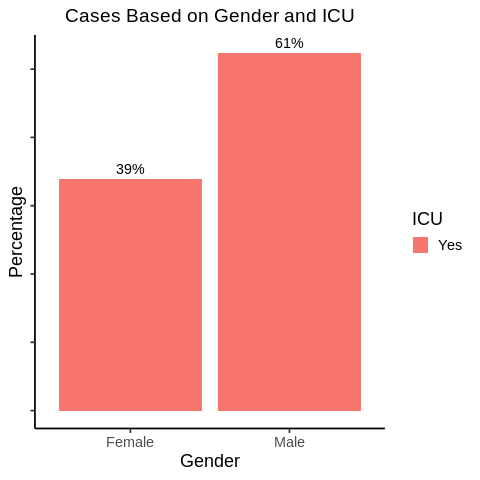

In [80]:
%%R
#icu cases men women ####
icu_cases<-mydata1 %>%filter(!is.na(hosp_yn))%>%filter(!is.na(sex)) %>%group_by(icu_yn,sex)%>%summarize(count=n())%>%
  mutate(percentage=prop.table(count))
# removing the missing other and unknown sexes
icu_cases<-icu_cases%>%filter(sex %in% c('Female','Male'))
icu_cases<-icu_cases%>%filter(icu_yn %in% c('Yes'))
icu_cases%>% ggplot(aes(sex,count,fill=icu_yn,label = scales::percent(percentage)))+geom_bar(stat="identity",position ='dodge')+
  theme_classic(base_size = 18)+
  xlab("Gender")+ 
  ylab("Percentage")+ 
  labs(fill="ICU")+geom_text(position = position_dodge(width = .9),vjust = -0.5,size = 5)+labs(title = 'Cases Based on Gender and ICU')+
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+ggeasy::easy_center_title()+theme(plot.title = element_text(size=19))
  

R[write to console]: `summarise()` has grouped output by 'icu_yn', 'sex'. You can override using the `.groups` argument.



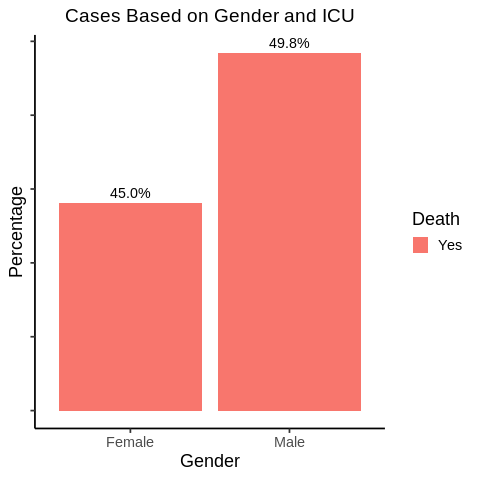

In [88]:
%%R
#icu cases men women ####
death_cases<-mydata1 %>%filter(!is.na(hosp_yn))%>%filter(!is.na(sex)) %>%filter(!is.na(death_yn))%>%group_by(icu_yn,sex,death_yn)%>%summarize(count=n())%>%
  mutate(percentage=prop.table(count))
  #  removing the missing other and unknown sexes
death_cases<-death_cases%>%filter(sex %in% c('Female','Male'))
death_cases<-death_cases%>%filter(icu_yn %in% c('Yes'))
death_cases<-death_cases%>%filter(death_yn %in% c('Yes'))
death_cases%>% ggplot(aes(sex,count,fill=death_yn,label = scales::percent(percentage)))+geom_bar(stat="identity",position ='dodge')+
  theme_classic(base_size = 18)+
  xlab("Gender")+ 
  ylab("Percentage")+ 
  labs(fill="Death")+geom_text(position = position_dodge(width = .9),vjust = -0.5,size = 5)+labs(title = 'Cases based on ')+
  scale_y_continuous(labels = scales::percent)+theme(axis.text.y = element_blank())+ggeasy::easy_center_title()+theme(plot.title = element_text(size=19))
  

In [87]:
%%R
death_cases

# A tibble: 2 x 5
# Groups:   icu_yn, sex [2]
  icu_yn sex    death_yn count percentage
  <chr>  <chr>  <chr>    <int>      <dbl>
1 Yes    Female Yes      14050      0.450
2 Yes    Male   Yes      24221      0.498


R[write to console]: `summarise()` has grouped output by 'date_by_month'. You can override using the `.groups` argument.



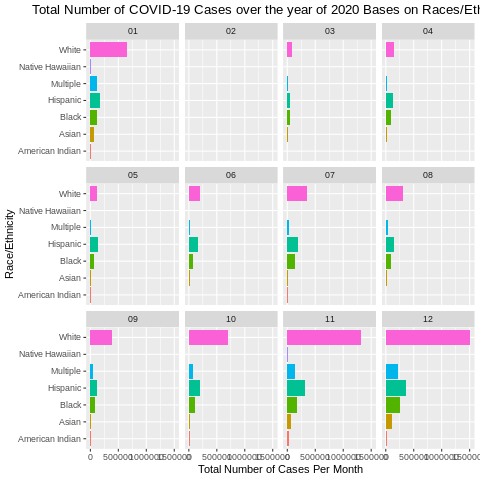

In [54]:
%%R

#race analysis for each month
race_df<-mydata1%>%filter(!is.na(race_ethnicity_combined)) %>% mutate(date_by_month= strftime(cdc_case_earliest_dt,'%m'))%>% 
  group_by(date_by_month, race_ethnicity_combined)%>%
  summarize(count=n())

race_df
x<-race_df$race_ethnicity_combined
race_df$race_ethnicity_combined<-gsub("(.*),.*", "\\1", x)
x<-race_df$race_ethnicity_combined
race_df$race_ethnicity_combined<-gsub("(.*)/.*", "\\1", x)
# removing missing and unknown
race_df<-as_tibble(race_df)
race_df %>% filter(race_df$race_ethnicity_combined %in% 
                     c("American Indian","Asian","Black","Hispanic","Multiple","Native Hawaiian","White"))

race_df<-race_df%>% filter(race_ethnicity_combined != c("Unknown"))
race_df<-race_df %>% filter(race_ethnicity_combined != c("Missing"))

race_df%>% ggplot(aes(y=race_ethnicity_combined,x= count,fill=race_ethnicity_combined))+
  geom_bar(stat="identity")+facet_wrap(~date_by_month)+labs(title = 'Total Number of COVID-19 Cases over the year of 2020 Bases on Races/Ethnicities ' , x='Total Number of Cases Per Month', y='Race/Ethnicity')+
  ggeasy::easy_center_title()+theme(legend.position = 'none')


In [55]:
#6
#age analysis for each month
age_df<-mydata1%>%filter(!is.na(race_ethnicity_combined)) %>% filter(!is.na(age_group))%>%mutate(date_by_month= strftime(cdc_case_earliest_dt,'%m'))%>% 
  group_by(date_by_month,age_group)%>%
  summarize(count=n())

age_df


age_df%>% ggplot(aes(y=age_group,x= count,fill=age_group))+
  geom_bar(stat="identity")+facet_wrap(~date_by_month)+labs(title = 'Total Number of COVID-19 Cases over the Year of 2020 for Diffferent Age Groups' , x='Total Number of Cases Per Month', y='Age Groups')+
  ggeasy::easy_center_title()+theme(legend.position = 'none')
  

SyntaxError: ignored